# <center> Health Monitoring Project

Data Importation

In [1]:
import pandas as pd

In [4]:
health_data=pd.read_csv('Data\HealthMonitoring.csv')

In [5]:
print(health_data)

     PatientID  Age  Gender  HeartRate BloodPressure  RespiratoryRate  \
0            1   69    Male  60.993428        130/85               15   
1            2   32    Male  98.723471        120/80               23   
2            3   78  Female  82.295377        130/85               13   
3            4   38  Female  80.000000        111/78               19   
4            5   41    Male  87.531693        120/80               14   
..         ...  ...     ...        ...           ...              ...   
495        496   61    Male  85.077820        135/76               22   
496        497   62  Female  99.925508        130/85               14   
497        498   49  Female  98.619323        120/80               16   
498        499   62    Male  99.248763        130/85               14   
499        500   78    Male  81.234401        130/85               22   

     BodyTemperature ActivityLevel  OxygenSaturation SleepQuality StressLevel  \
0          98.885236       resting        

Let's list the variables contains in the data set

In [7]:
[col for col in health_data.columns]

['PatientID',
 'Age',
 'Gender',
 'HeartRate',
 'BloodPressure',
 'RespiratoryRate',
 'BodyTemperature',
 'ActivityLevel',
 'OxygenSaturation',
 'SleepQuality',
 'StressLevel',
 'Timestamp']

Let's have a look on wether the data contains null values or not.

In [10]:
health_data.isnull().sum()

PatientID             0
Age                   0
Gender                0
HeartRate             0
BloodPressure         0
RespiratoryRate       0
BodyTemperature      18
ActivityLevel         0
OxygenSaturation    163
SleepQuality          0
StressLevel           0
Timestamp             0
dtype: int64

Only the BodyTemperature and the OxygenSaturation columns contain null values.

For simplicity, let's fill them with the median

In [11]:
median_body_temp = health_data['BodyTemperature'].median()
median_oxygen_sat = health_data['OxygenSaturation'].median()

Filling with median values

In [12]:
health_data['BodyTemperature'].fillna(median_body_temp,inplace=True)
health_data['OxygenSaturation'].fillna(median_oxygen_sat, inplace=True)

### <center> Next, let's examine the distribution and summary staistics of the numerical health metrics (Age, Heart Rate, Respiratory Rate, Body Temperature and Oxygen Saturation)

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

In [14]:
sns.set(style="whitegrid")

In [15]:
#summary statistics

summary_sats = health_data.describe()

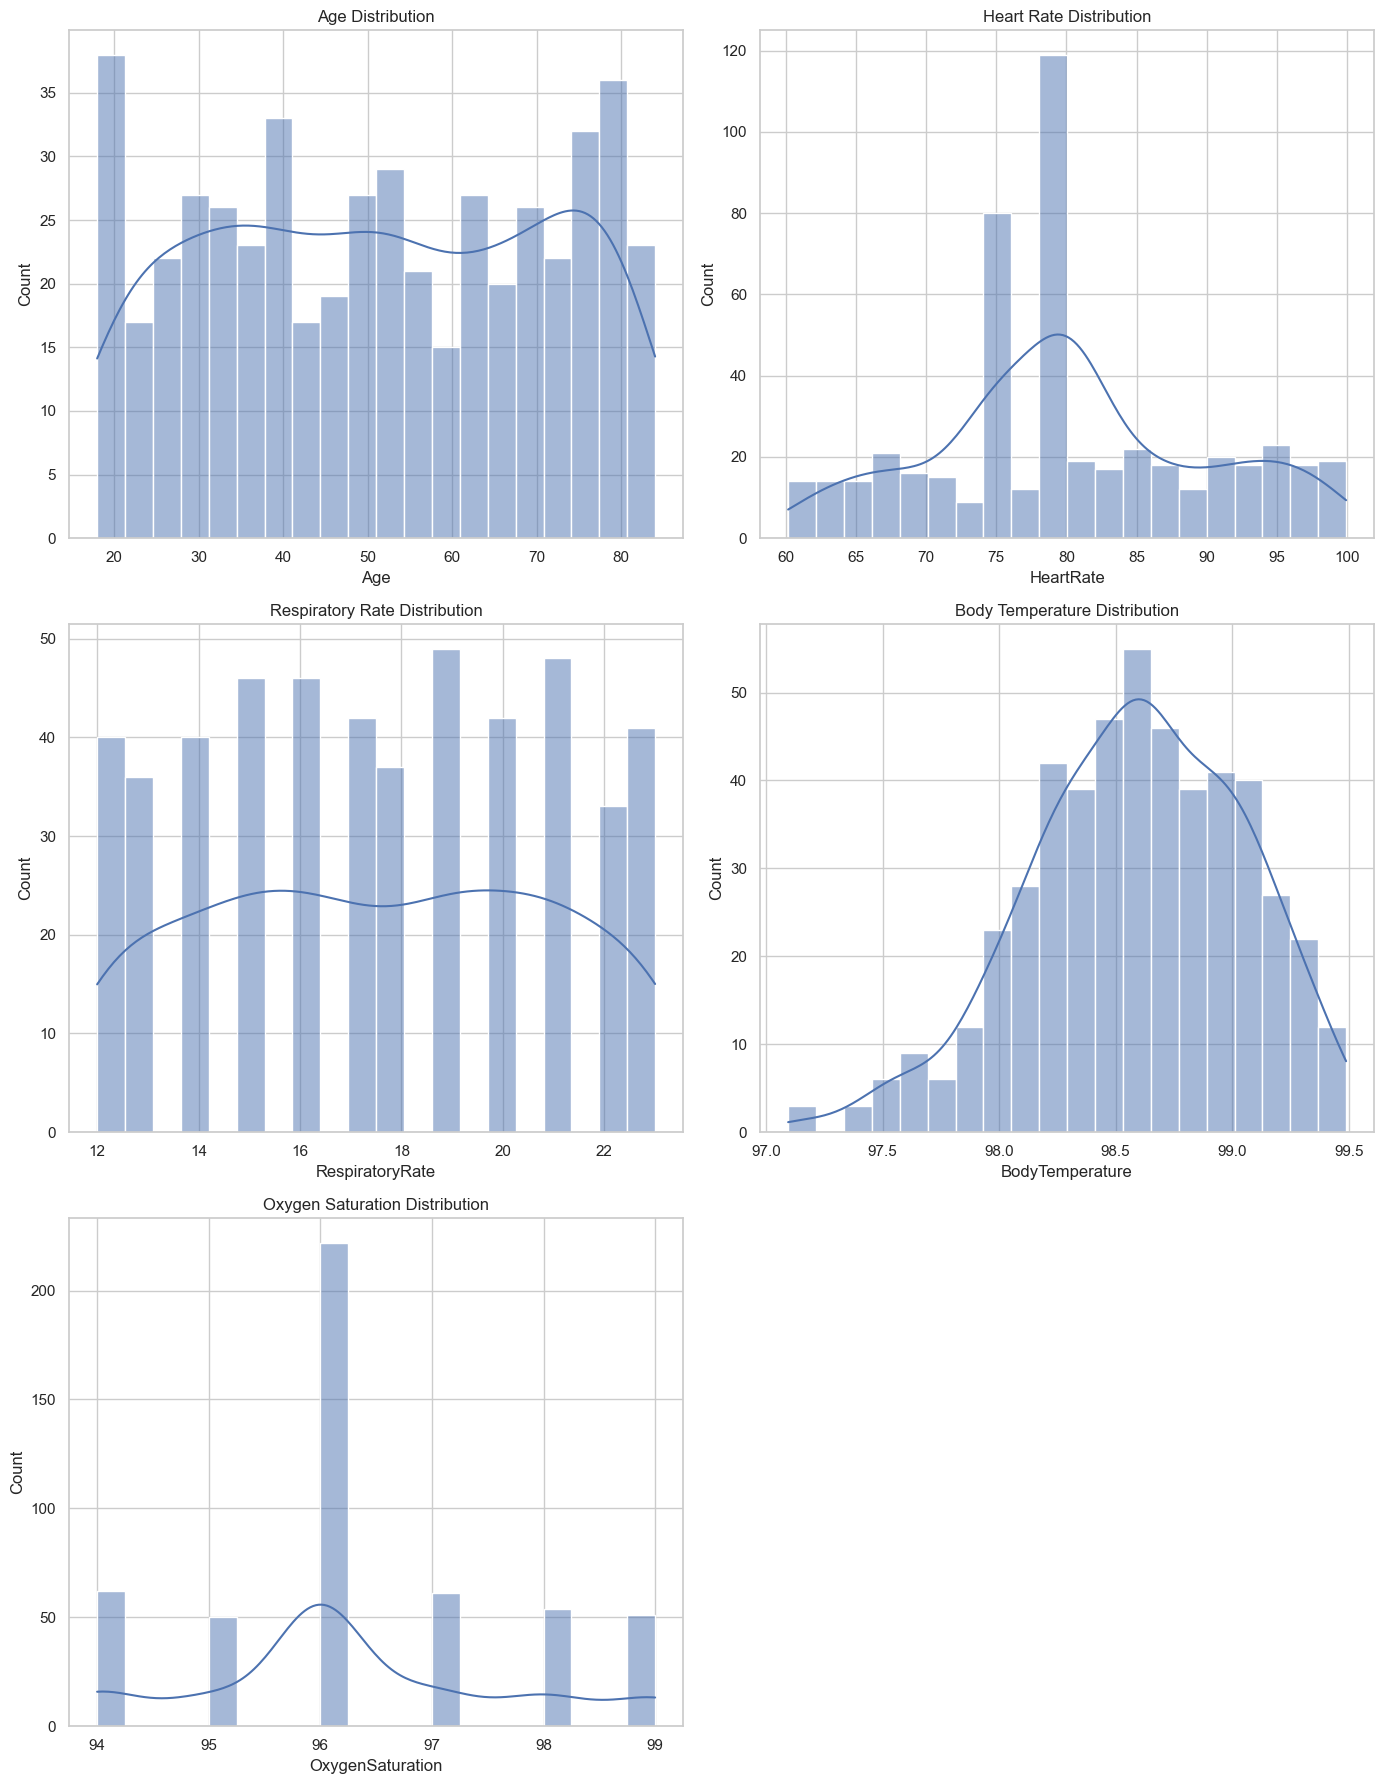

In [17]:
#Plotting distribution of numerical features

fig, axes= plt.subplots(3,2, figsize= (14,18))
sns.histplot(health_data['Age'], bins=20, kde=True, ax=axes[0,0])
axes[0,0].set_title('Age Distribution')


sns.histplot(health_data['HeartRate'], bins=20, kde=True, ax=axes[0,1])
axes[0,1].set_title('Heart Rate Distribution')


sns.histplot(health_data['RespiratoryRate'], bins=20, kde=True, ax=axes[1,0])
axes[1,0].set_title('Respiratory Rate Distribution')


sns.histplot(health_data['BodyTemperature'], bins=20, kde=True, ax=axes[1,1])
axes[1,1].set_title('Body Temperature Distribution')



sns.histplot(health_data['OxygenSaturation'], bins=20, kde=True, ax=axes[2,0])
axes[2,0].set_title('Oxygen Saturation Distribution')


fig.delaxes(axes[2,1]) # rmoving unused subplot
plt.tight_layout()
plt.show()

In [18]:
print(summary_sats)

        PatientID         Age   HeartRate  RespiratoryRate  BodyTemperature  \
count  500.000000  500.000000  500.000000       500.000000       500.000000   
mean   250.500000   51.146000   80.131613        17.524000        98.584383   
std    144.481833   19.821566    9.606273         3.382352         0.461502   
min      1.000000   18.000000   60.169259        12.000000        97.094895   
25%    125.750000   34.000000   75.000000        15.000000        98.281793   
50%    250.500000   51.000000   80.000000        17.500000        98.609167   
75%    375.250000   69.000000   86.276413        20.000000        98.930497   
max    500.000000   84.000000   99.925508        23.000000        99.489150   

       OxygenSaturation  
count        500.000000  
mean          96.296000  
std            1.408671  
min           94.000000  
25%           96.000000  
50%           96.000000  
75%           97.000000  
max           99.000000  


Now, let's have a look at the gender distribution in the data and the correlation between the numerical columns in the dataset

In [19]:
#gender distribution
gender_counts = health_data['Gender'].value_counts()

In [21]:
#correlation matrix for  numerical health metrics
correlation_matrix = health_data[['Age','HeartRate','RespiratoryRate','BodyTemperature','OxygenSaturation']].corr()

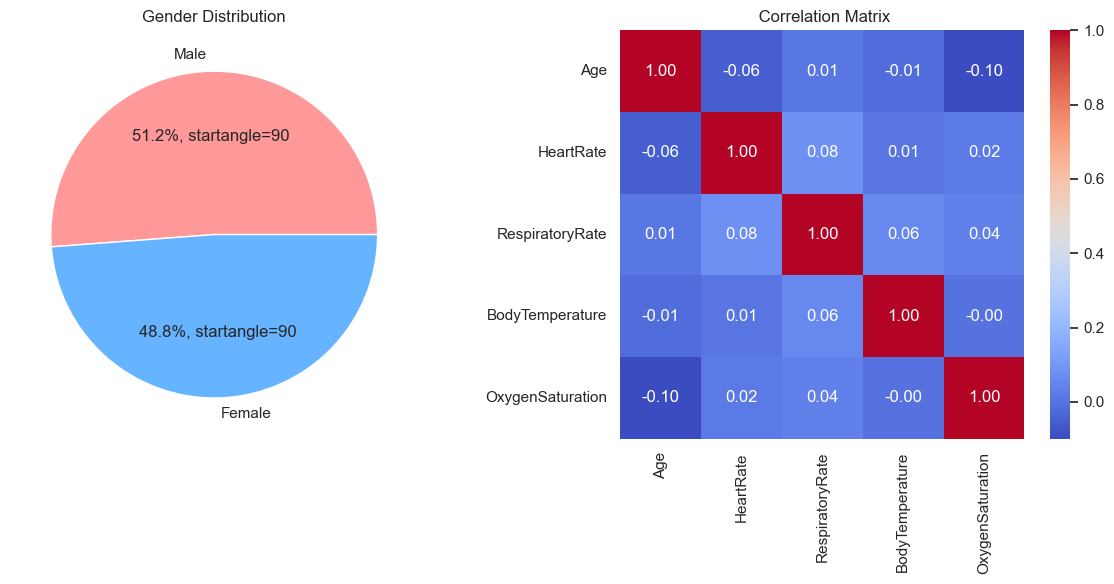

In [23]:
#plotting the findings

fig,axes = plt.subplots(1,2, figsize = (12,6))

#gender distribution plot

gender_counts.plot(kind='pie', ax=axes[0], autopct='%1.1f%%, startangle=90', colors=['#ff9999','#66b3ff'])
axes[0].set_ylabel('')
axes[0].set_title('Gender Distribution')

# correlation matrix plot

sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', ax=axes[1])
axes[1].set_title(' Correlation Matrix')

plt.tight_layout()
plt.show()